# Notebook 3:  Redes de Kohonen y SOM (Self organized maps)
En este notebook vamos a implementar el algoritmo de clustering SOM en R. El objetivo es entender como funciona este algoritmo y  aprender a utilizarlo con un ejemplo simple. Recuerde instalar previamente el paquete kohonen en R.



In [41]:
library(kohonen)
set.seed(7)

#ruta datos
#lee datos del archivo de texto como una matriz. La primera #columna se utiliza como vector de nombres de las filas
datos <-read.table("milk1.dat",row.names=1,dec=".",header=TRUE)
datos <- as.data.frame(datos)
summary(datos)

     WATER          PROTEIN            FAT           LACTOSE     
 Min.   :44.90   Min.   : 0.600   Min.   : 1.00   Min.   :0.000  
 1st Qu.:71.30   1st Qu.: 3.000   1st Qu.: 3.40   1st Qu.:2.700  
 Median :82.00   Median : 5.900   Median : 6.30   Median :4.700  
 Mean   :78.18   Mean   : 6.212   Mean   :10.31   Mean   :4.132  
 3rd Qu.:87.70   3rd Qu.: 9.700   3rd Qu.:13.10   3rd Qu.:5.600  
 Max.   :90.40   Max.   :12.300   Max.   :42.00   Max.   :6.900  
      ASH        
 Min.   :0.1000  
 1st Qu.:0.5300  
 Median :0.8000  
 Mean   :0.8632  
 3rd Qu.:1.1000  
 Max.   :2.3000  

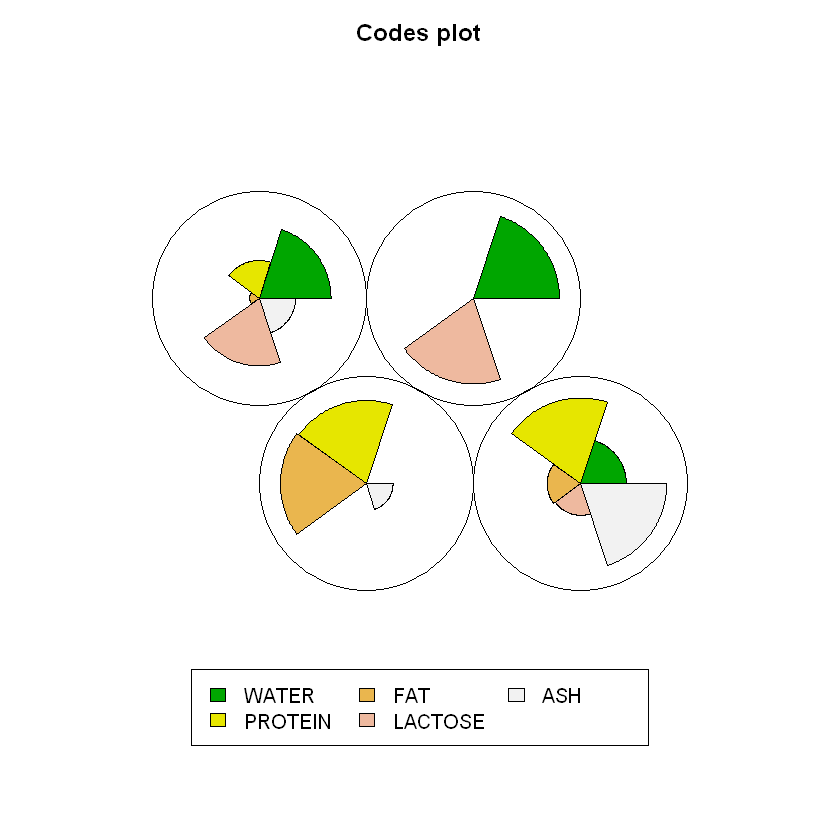

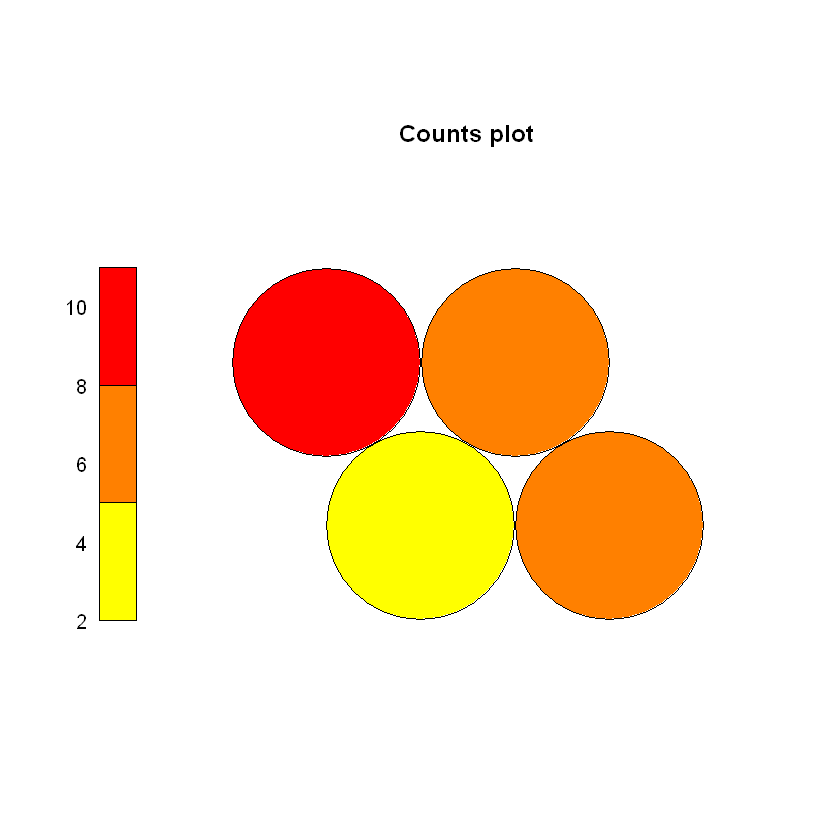

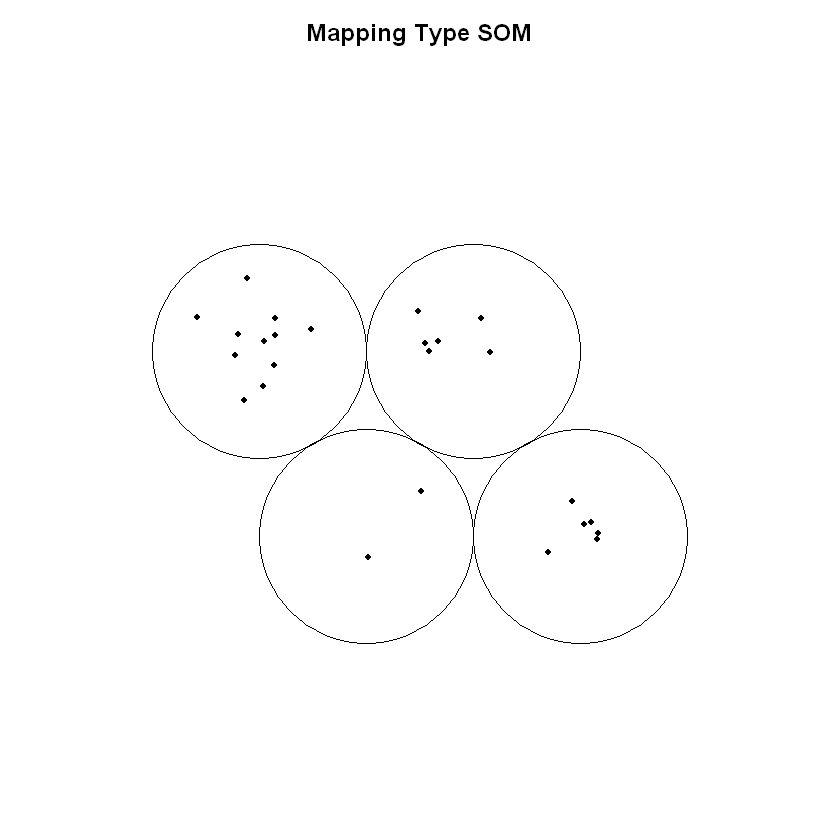

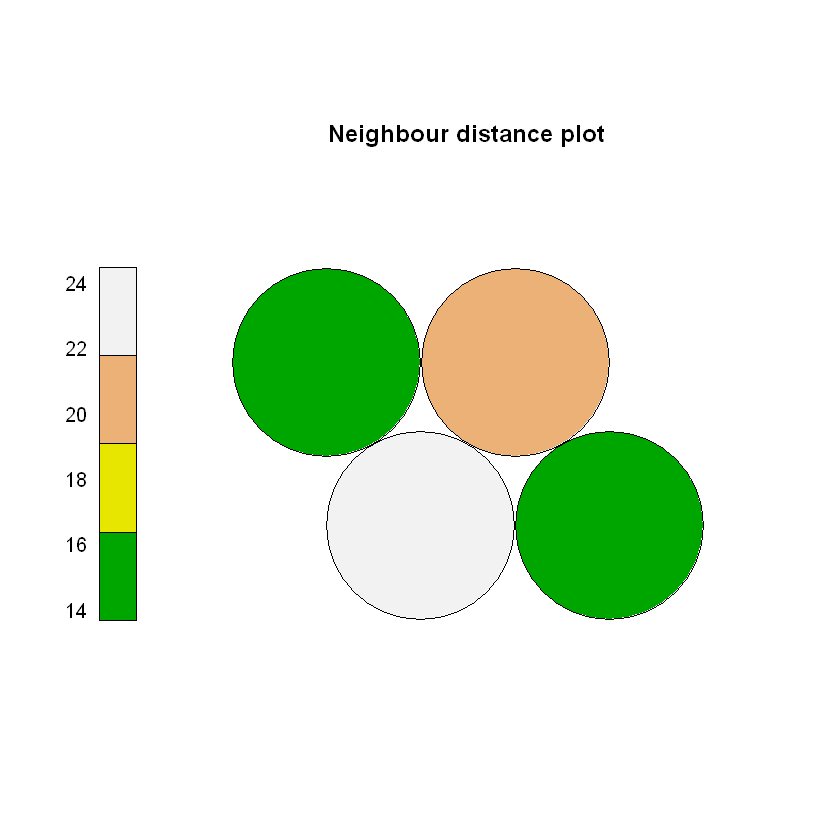

In [42]:
#create SOM grid
sommap <- som(scale(datos), grid = somgrid(2, 2, "hexagonal"))
plot(sommap)

colors <- function(n, alpha = 1) {
    rev(heat.colors(n, alpha))
}

plot(sommap, type = "counts", palette.name = colors, heatkey = TRUE)

plot(sommap, type = "mapping", pchs = 20, main = "Mapping Type SOM")

plot(sommap, type = "dist.neighbours", palette.name = terrain.colors)


Ejercicio 1: 

**a) Explique como funciona el método som, describa parámetros de entrada y salida y los gráficos obtenidos.**


Crea un mapa autoorganizado para mapear patrones de altas dimensiones. Utiliza distancia euclidiana.

some(x, n=10, cols=NULL):
    - x = objeto a muestrear
    - n = número de elementos a muestrear
    - cols = si NULL, usa todas las columnas,si es un vector, usa solo las columnas indicadas
    
retorna una matriz de datos (si se selecciona keep.data=TRUE).
    
**b) Modifique parámetros de entrada. Interprete y comente los resultados obtenidos.**

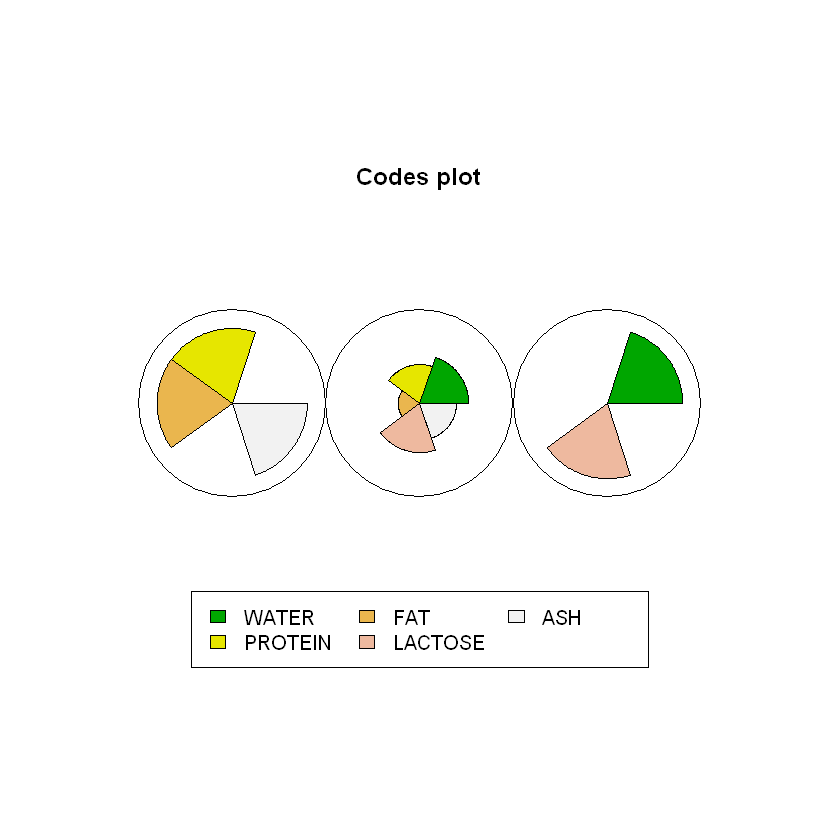

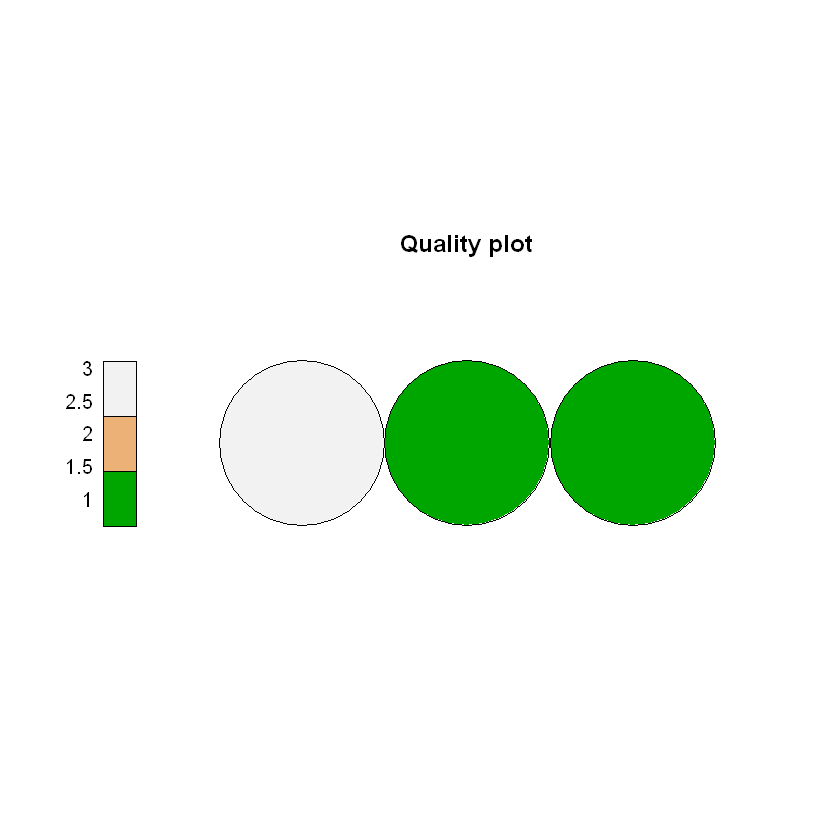

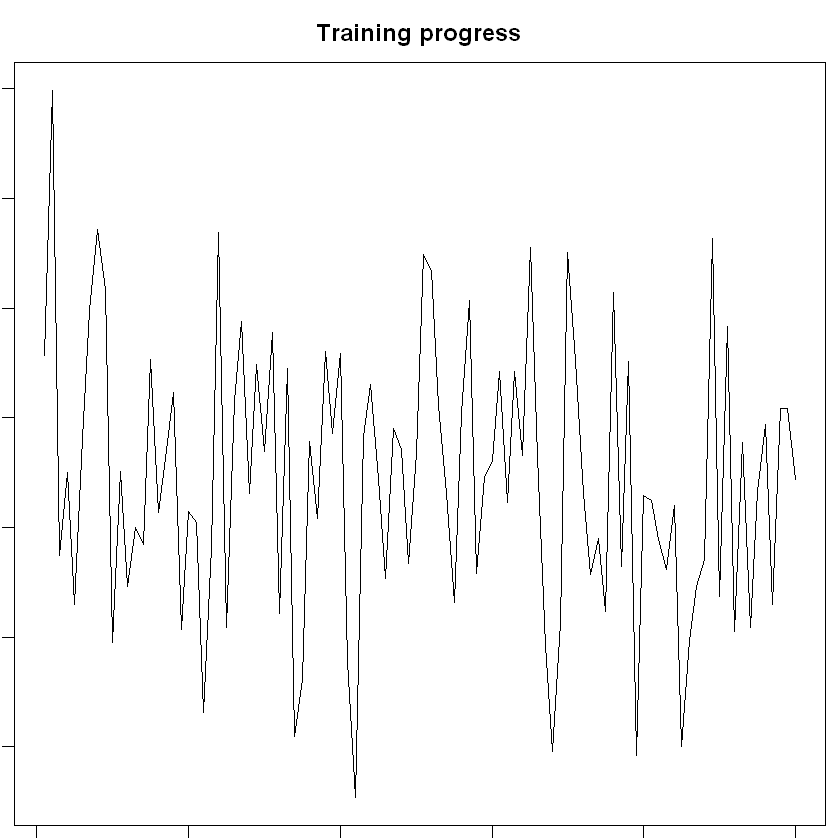

In [44]:
sommap2 <- som(scale(datos), grid = somgrid(3, 1, "rectangular"))
plot(sommap2)
plot(sommap2, type = "quality", palette.name = terrain.colors)
plot(sommap2, type = "changes")

In [271]:
rownames(datos)

[1] "HORSE"      "ORANGUTAN"  "MONKEY"     "DONKEY"     "HIPPO"     
 [6] "CAMEL"      "BISON"      "BUFFALO"    "GUINEA_PIG" "CAT"       
[11] "FOX"        "LLAMA"      "MULE"       "PIG"        "ZEBRA"     
[16] "SHEEP"      "DOG"        "ELEPHANT"   "RABBIT"     "RAT"       
[21] "DEER"       "REINDEER"   "WHALE"      "SEAL"       "DOLPHIN"

Si se modifica los parametros dentro de grid, se cambia el tamaño de la grilla en donde los datos son agrupados. Si se cambia el tercer parámetro (está entre comillas) cambia la forma de la grilla, en este caso a una rectangular. Además, se agregó un último gráfico ("changes") que visualiza el cambio de las distancias medias.

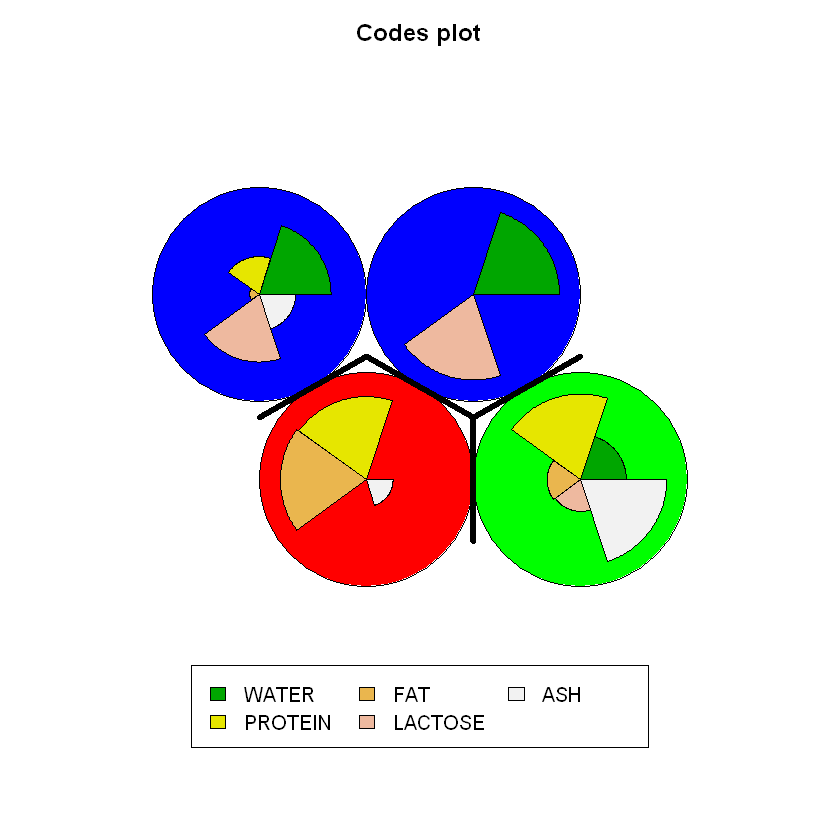

In [45]:
mat <- matrix(sommap$codes[[1]], ncol=4,nrow=4,byrow=FALSE)

## use hierarchical clustering to cluster the codebook vectors
groups<-3
som.hc <- cutree(hclust(dist(mat)), groups)

#plot
plot(sommap, type="codes", bgcol=rainbow(groups)[som.hc])

#cluster boundaries
add.cluster.boundaries(sommap, som.hc)


Ejercicio 2: 

**a) Explique como funciona esta nueva visualización.**

Crea una matriz 4x4, cada fila corresponde a uno de los vectores representativos. La cantidad de cluster es 3. Analiza el dendograma cortando el árbol en 3 ramas. Cada color del círculo representa uno de los grupos. Al final, está el cluster.boudaries que agrega al mapa líneas gruesas, visualizando qué unidades se deberían agrupar.

**b) Interprete y comente los resultados obtenidos.** 

Los dos primeros grupos, representados con el color azul, deberían ser solo un grupo. Según los componentes, poseen similar cantidad de agua (verdes) y lactosa (rosa).



Ejercicio 3: 

**a) Proponga un nuevo conjunto de datos a los cuales aplicar este algoritmo. Justifique su elección**

Este conjunto de datos consta de 101 animales de un zoológico. Hay 16 variables con varios rasgos para describir a los animales.


    animal_name: Unique for each instance
    hair Boolean
    feathers Boolean
    eggs Boolean
    milk Boolean
    airborne Boolean
    aquatic Boolean
    predator Boolean
    toothed Boolean
    backbone Boolean
    breathes Boolean
    venomous Boolean
    fins Boolean
    legs Numeric (set of values: {0,2,4,5,6,8})
    tail Boolean
    domestic Boolean
    catsize Boolean
    class_type Numeric (integer values in range [1,7])


**b) Realice las estimaciones y discuta sus resultados.**

In [382]:
data <-read.table("zoo.csv",sep=",",header=TRUE)
data <- as.data.frame(data)
dat <-data[,2:18]

In [406]:
rownames(dat)<-data[,1:101]

ERROR: Error in `[.data.frame`(data, , 1:101): undefined columns selected


In [411]:
sommap <- som(scale(dat), grid = somgrid(3, 5, "hexagonal"))
mat <- matrix(sommap$codes[[1]], ncol=4,nrow=15 ,byrow=FALSE)

Msom <- Mclust(mat, G=3)$classification
plot(sommap, type="codes", bgcol=rainbow(groups)[Msom], main="Clustering c/Mclust")
add.cluster.boundaries(sommap, Msom)

Hsom <- cutree(hclust(dist(mat)), 3)
plot(sommap, type="codes", bgcol=rainbow(groups)[Hsom], main="Clustering c/Hclust")
add.cluster.boundaries(sommap, Hsom)

Warning message in matrix(sommap$codes[[1]], ncol = 4, nrow = 15, byrow = FALSE):
"la longitud de los datos [255] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz"


ERROR: Error in Mclust(mat, G = 3): no se pudo encontrar la función "Mclust"


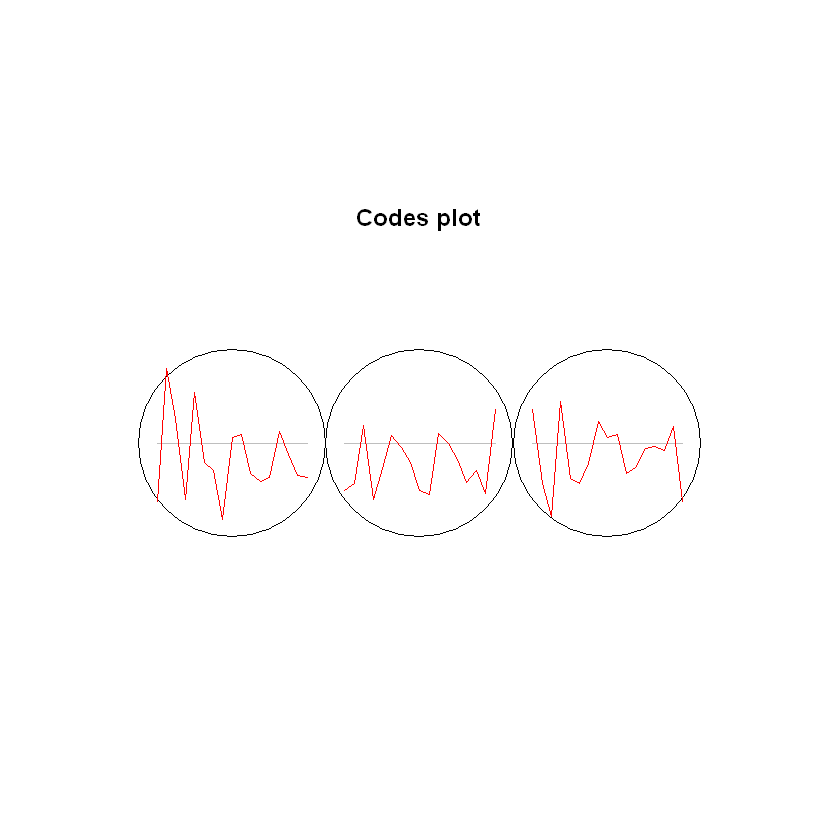

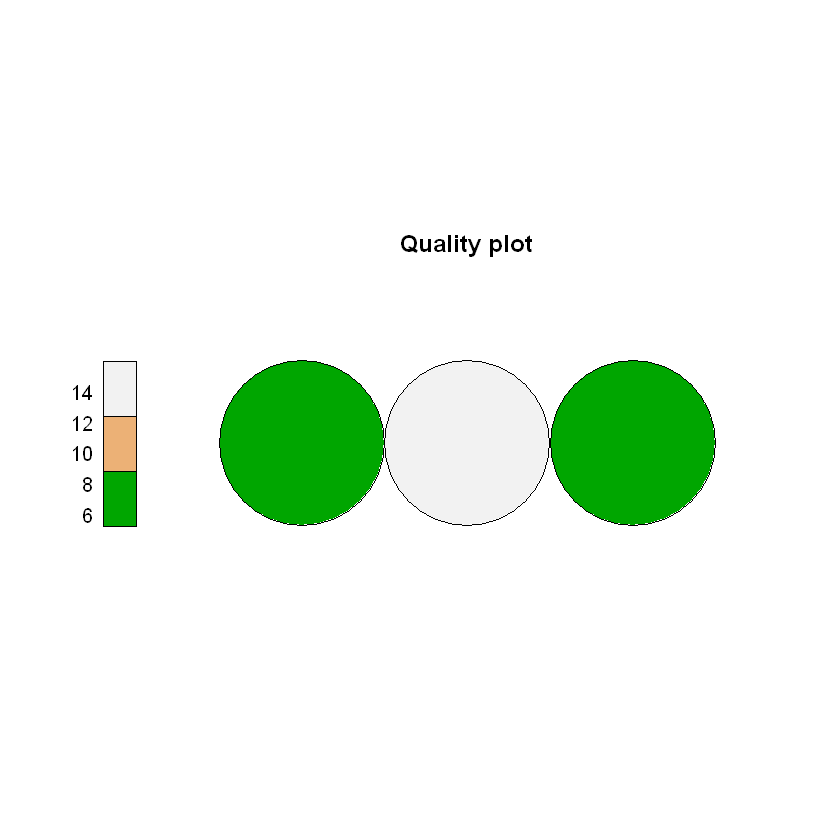

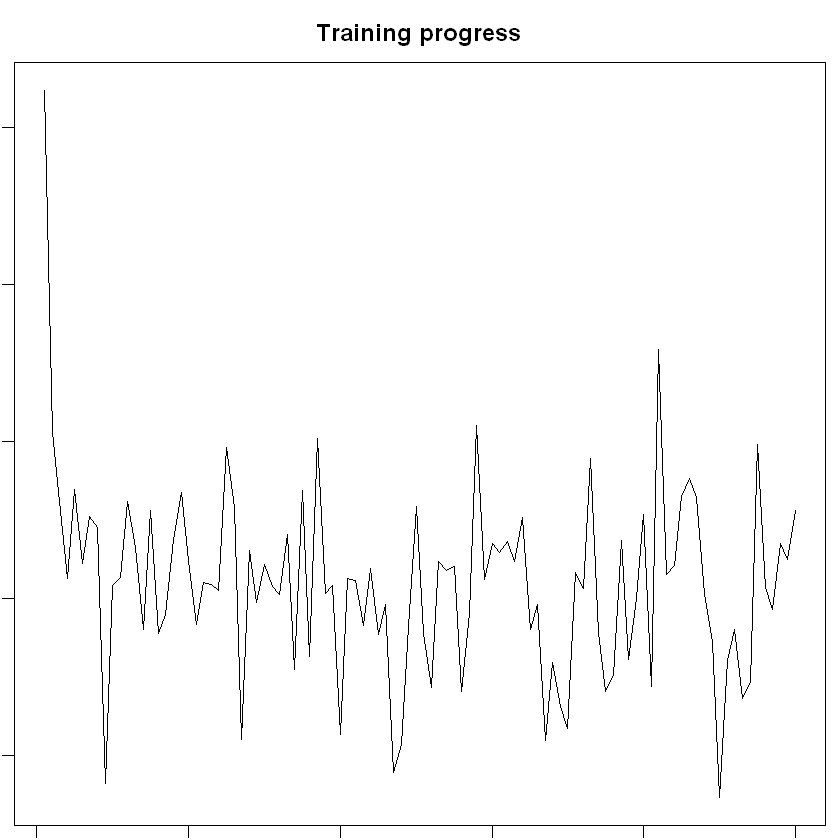

In [375]:
sommap2 <- som(scale(dat), grid = somgrid(3, 1, "rectangular"))
plot(sommap2)
plot(sommap2, type = "quality", palette.name = terrain.colors)
plot(sommap2, type = "changes")